In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

C:\Users\tyagi\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Univariat analysis Continous

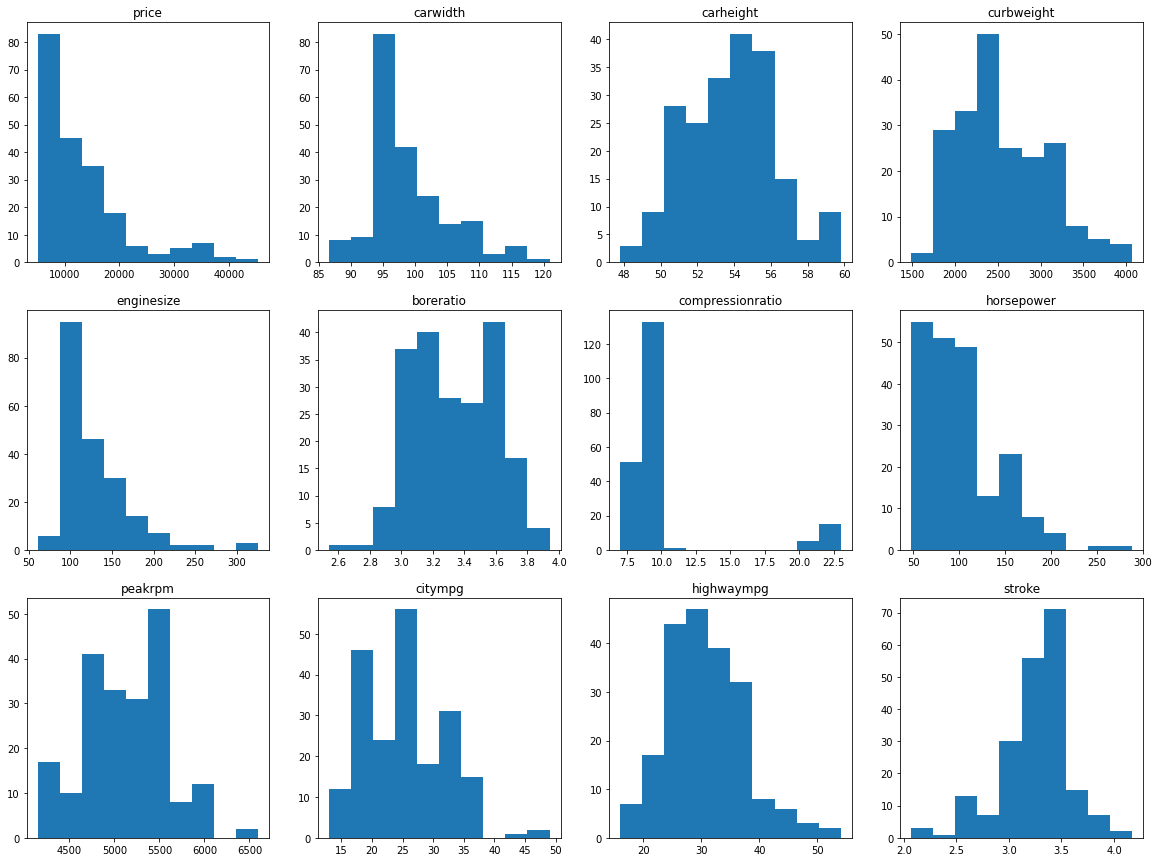

In [5]:
all_varibles = ["symboling",]
fig,ax = plt.subplots(3,4,figsize=(20,15))
ax[0,0].hist(df["price"])
ax[0,0].set_title("price")
ax[0,1].hist(df["wheelbase"])
ax[0,1].set_title("carwidth")
ax[0,2].hist(df["carheight"])
ax[0,2].set_title("carheight")
ax[0,3].hist(df["curbweight"])
ax[0,3].set_title("curbweight")
ax[1,0].hist(df["enginesize"])
ax[1,0].set_title("enginesize")
ax[1,1].hist(df["boreratio"])
ax[1,1].set_title("boreratio")
ax[1,2].hist(df["compressionratio"])
ax[1,2].set_title("compressionratio")
ax[1,3].hist(df["horsepower"])
ax[1,3].set_title("horsepower")
ax[2,0].hist(df["peakrpm"])
ax[2,0].set_title("peakrpm")
ax[2,1].hist(df["citympg"])
ax[2,1].set_title("citympg")
ax[2,2].hist(df["highwaympg"])
ax[2,2].set_title("highwaympg")
ax[2,3].hist(df["stroke"])
ax[2,3].set_title("stroke")
plt.show()

# Univariat analysis Categorical

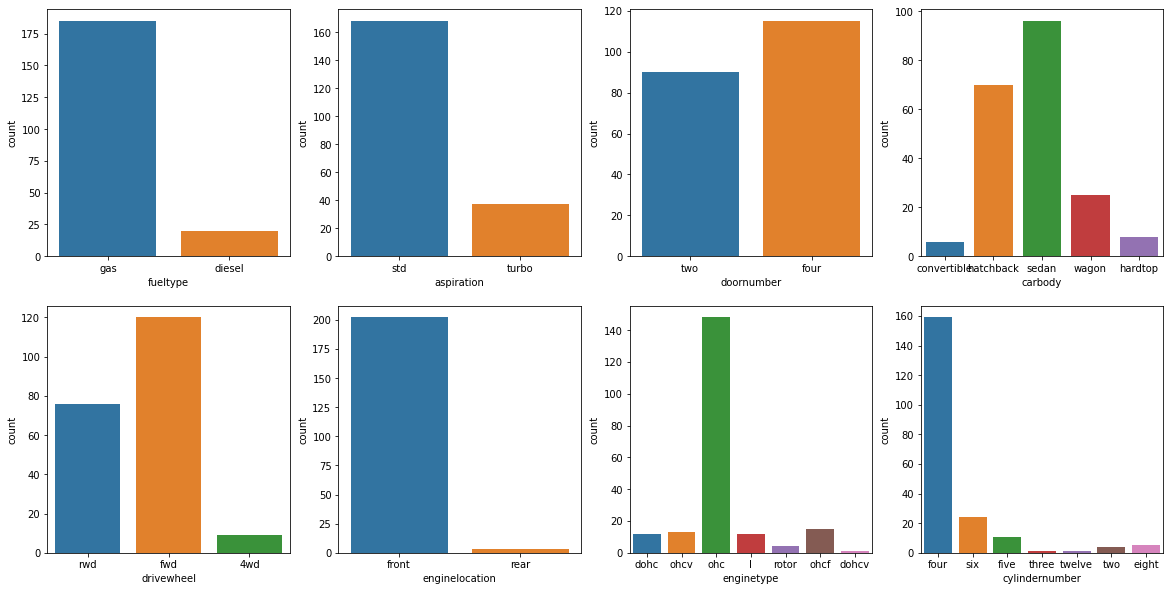

In [6]:
fig,axs=plt.subplots(2,4,figsize=(20,10))
sb.countplot(ax=axs[0,0],x ="fueltype",data=df)
sb.countplot(ax=axs[0,1],x ="aspiration", data=df)
sb.countplot(ax=axs[0,2],x ="doornumber", data=df)
sb.countplot(ax=axs[0,3],x ="carbody", data=df)
sb.countplot(ax=axs[1,0],x ="drivewheel",data=df)
sb.countplot(ax=axs[1,1],x ="enginelocation", data=df)
sb.countplot(ax=axs[1,2],x ="enginetype", data=df)
sb.countplot(ax=axs[1,3],x ="cylindernumber", data=df)
plt.show()

# Bivariate Continous

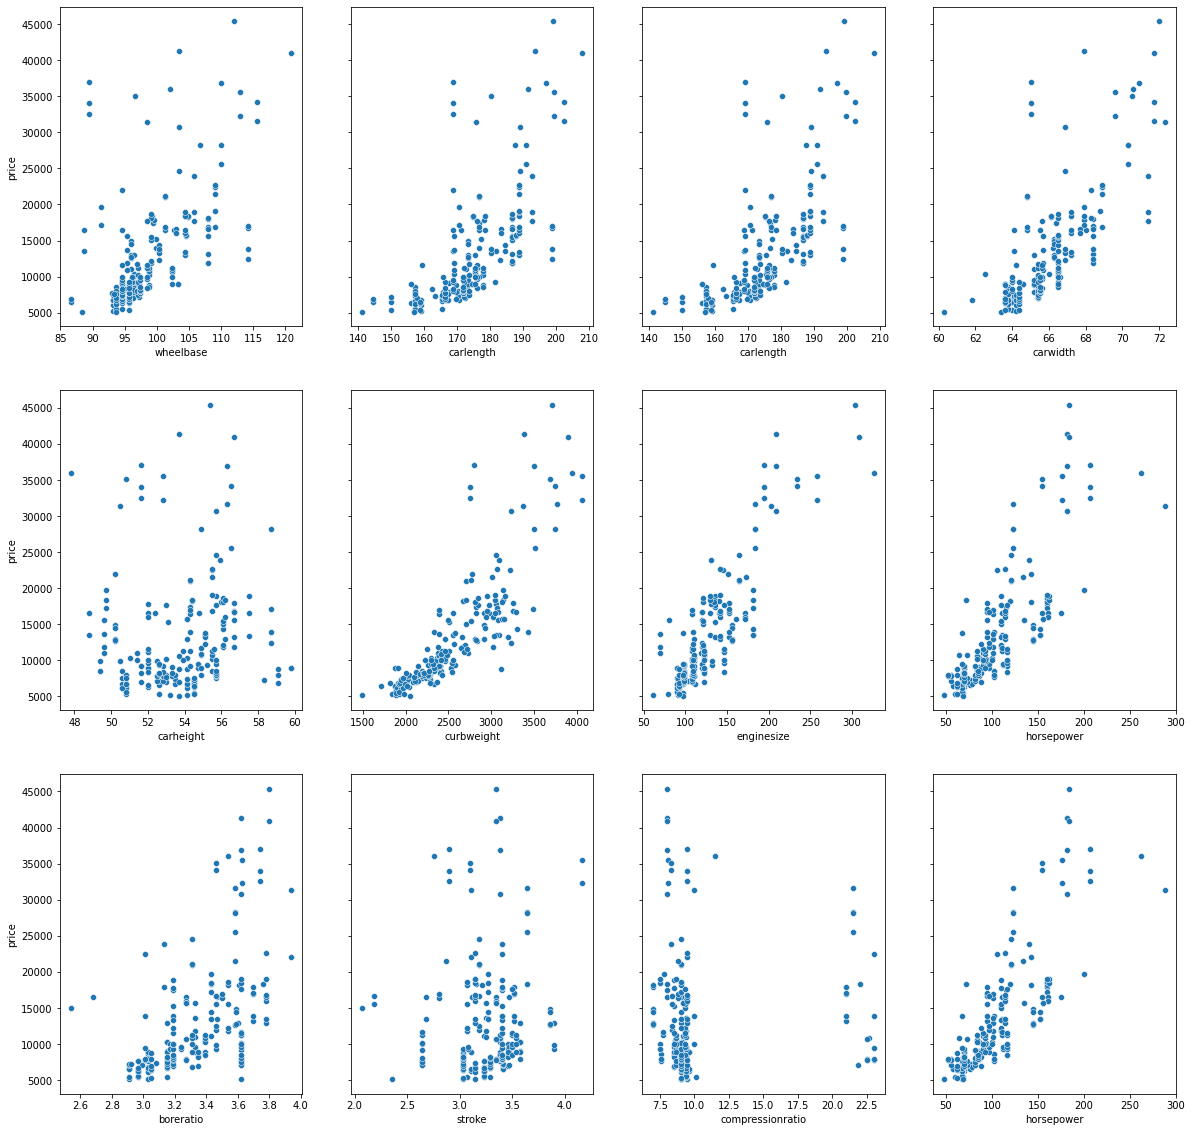

In [20]:
fig1,axs = plt.subplots(3,4,figsize=(20,20),squeeze=False,sharey=True)
sb.scatterplot(ax=axs[0,0],x=df["wheelbase"],y=df["price"],data=df)
sb.scatterplot(ax=axs[0,1],x=df["carlength"],y=df["price"],data=df)
sb.scatterplot(ax=axs[0,2],x=df["carlength"],y=df["price"],data=df)
sb.scatterplot(ax=axs[0,3],x=df["carwidth"],y=df["price"],data=df)
sb.scatterplot(ax=axs[1,0],x=df["carheight"],y=df["price"],data=df)
sb.scatterplot(ax=axs[1,1],x=df["curbweight"],y=df["price"],data=df)
sb.scatterplot(ax=axs[1,2],x=df["enginesize"],y=df["price"],data=df)
sb.scatterplot(ax=axs[1,3],x=df["horsepower"],y=df["price"],data=df)
sb.scatterplot(ax=axs[2,0],x=df["boreratio"],y=df["price"],data=df)
sb.scatterplot(ax=axs[2,1],x=df["stroke"],y=df["price"],data=df)
sb.scatterplot(ax=axs[2,2],x=df["compressionratio"],y=df["price"],data=df)
sb.scatterplot(ax=axs[2,3],x=df["horsepower"],y=df["price"],data=df)
plt.show()

# Bivariate Categorical and Continous

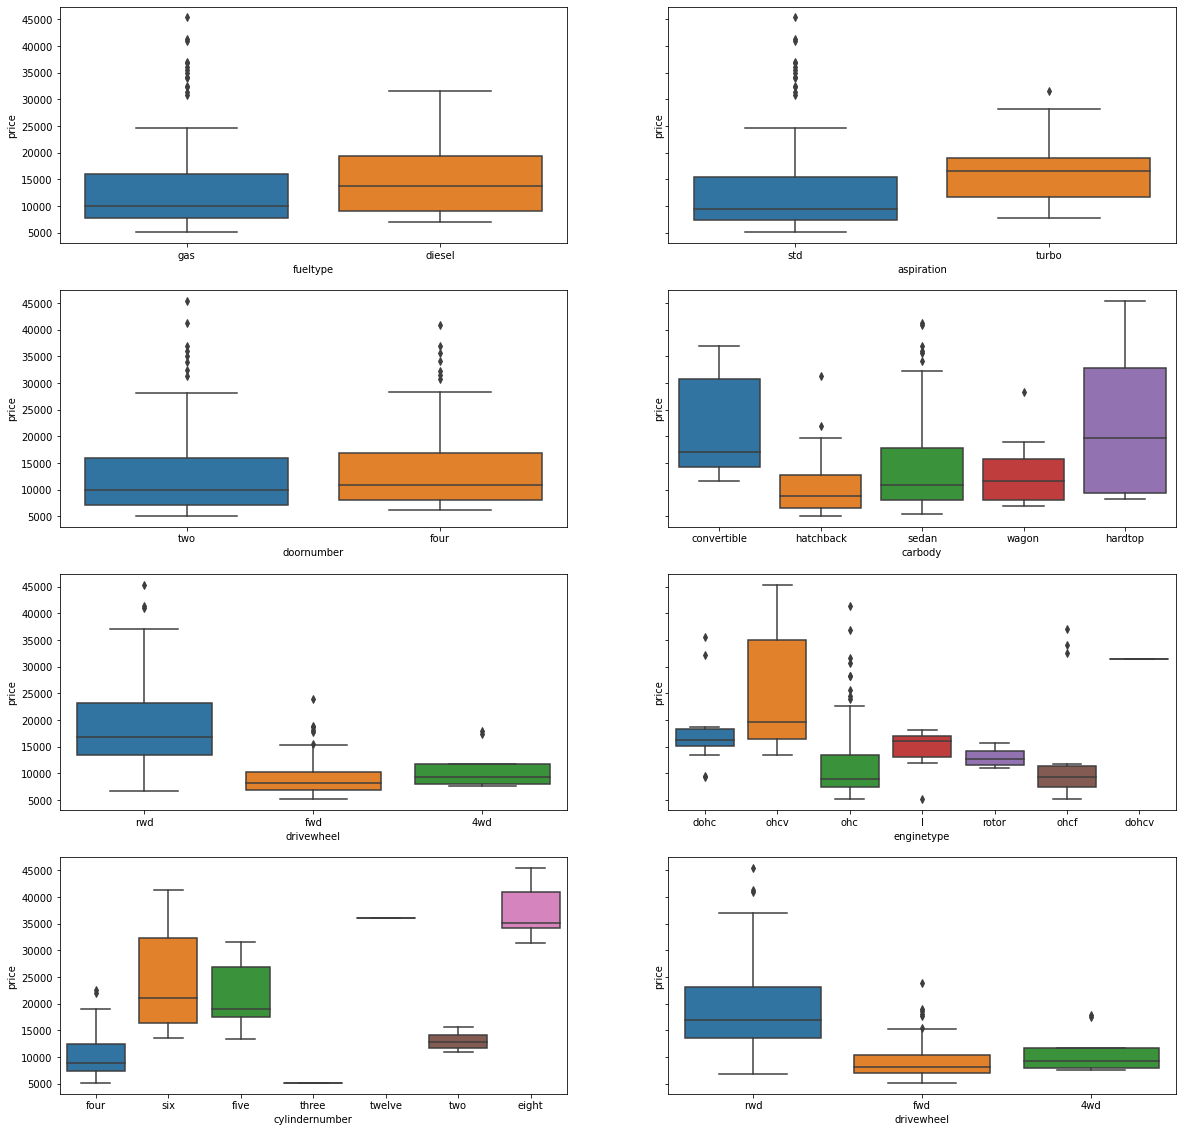

In [24]:
fig1,axs = plt.subplots(4,2,figsize=(20,20),squeeze=False,sharey=True)
sb.boxplot(ax=axs[0,0],x=df["fueltype"],y=df["price"],data=df)
sb.boxplot(ax=axs[0,1],x=df["aspiration"],y=df["price"],data=df)
sb.boxplot(ax=axs[1,0],x=df["doornumber"],y=df["price"],data=df)
sb.boxplot(ax=axs[1,1],x=df["carbody"],y=df["price"],data=df)
sb.boxplot(ax=axs[2,0],x=df["drivewheel"],y=df["price"],data=df)
sb.boxplot(ax=axs[2,1],x=df["enginetype"],y=df["price"],data=df)
sb.boxplot(ax=axs[3,0],x=df["cylindernumber"],y=df["price"],data=df)
sb.boxplot(ax=axs[3,1],x=df["drivewheel"],y=df["price"],data=df)
plt.show()

<Figure size 1440x1440 with 0 Axes>

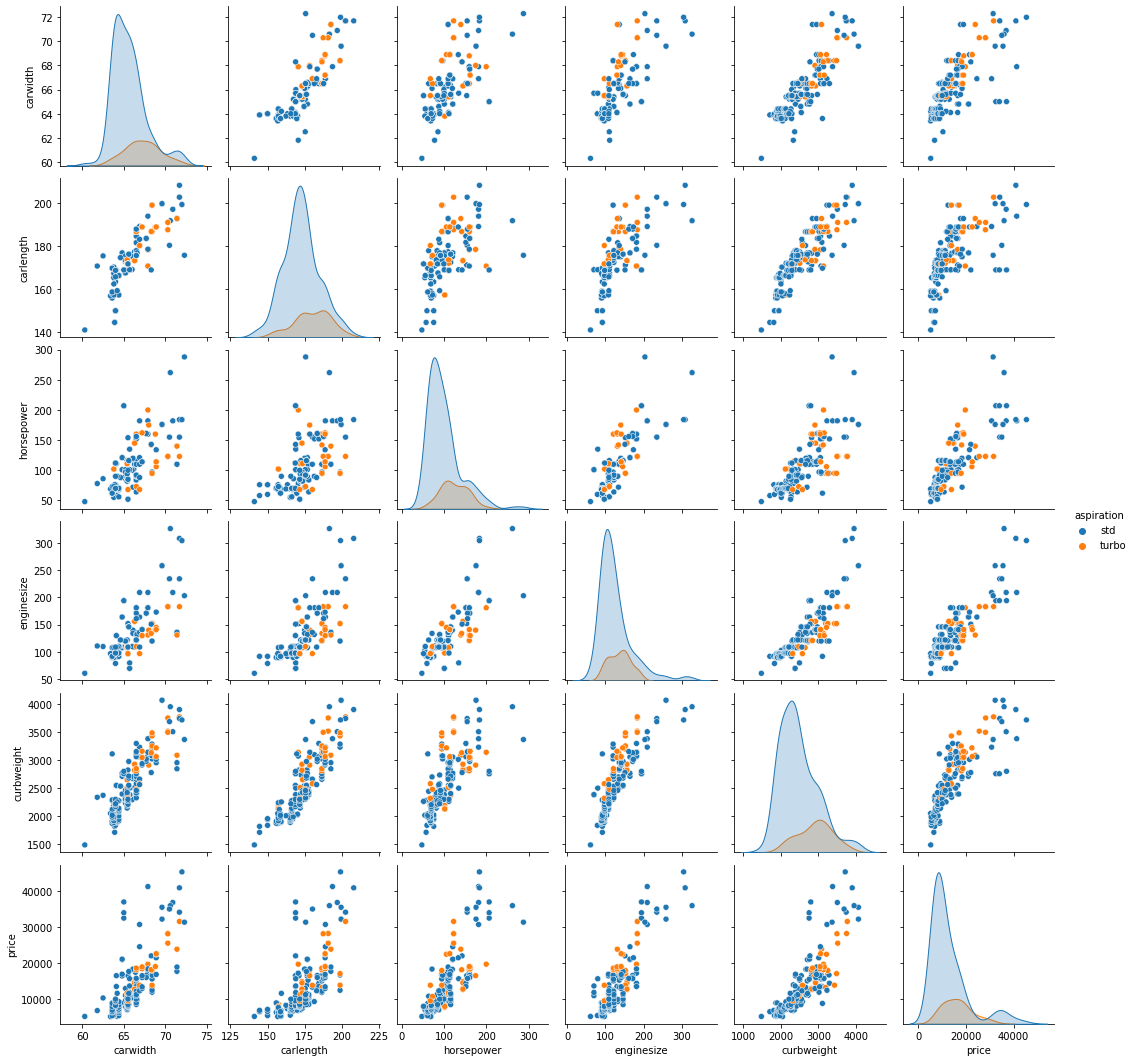

In [26]:
fig=plt.figure(figsize=(20,20))
sb.pairplot(df[["carwidth","carlength","horsepower", "enginesize", "curbweight","price","aspiration"]], hue="aspiration", diag_kind="auto")
plt.show()

# Correlation

C:\Users\tyagi\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


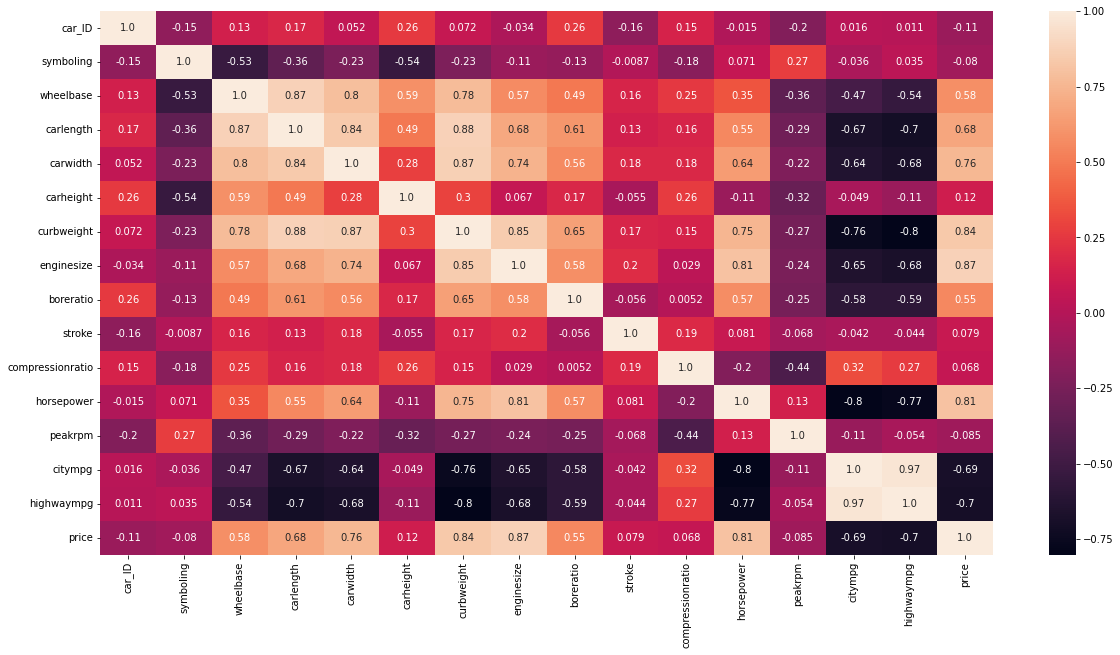

In [7]:
df_corr = df.corr()
fig = plt.figure(figsize=(20,10))
sb.heatmap(df_corr,annot=True,fmt=".2")
fig.show()

In [10]:
df_corr[df_corr["price"]>=0]["price"]

wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
price               1.000000
Name: price, dtype: float64

In [9]:
df_corr[df_corr["price"]<=0]["price"]

car_ID       -0.109093
symboling    -0.079978
peakrpm      -0.085267
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64